<a href="https://colab.research.google.com/github/Fatai-soliu/Text-Mining-and-Sentiment-Analysis/blob/main/YouTube_comment_Spam_detection_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
                  'punkt',
                   'wordnet',
                    'omw-1.4',
                     'vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Text Classification

In [10]:
data = pd.read_csv("/content/Youtubespamdataset.csv")

data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",Spam
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,Spam
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,Spam
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,Spam
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,Spam


In [11]:
print("\n All Data Labels")
print(data.groupby("CLASS").count())


 All Data Labels
       COMMENT_ID  AUTHOR  DATE  CONTENT
CLASS                                   
Ham           951     951   951      951
Spam         1005    1005   760     1005


In [16]:
stop_words = nltk.corpus.stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) # Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
  return stemmed_text

In [18]:
data = data[['CONTENT','CLASS']]

data['CONTENT'] = data['CONTENT'].apply(preprocess_text)

data.head()

,CONTENT,CLASS
0,"[huh, anyway, check, tube, channel, kobyoshi02]",Spam
1,"[hey, guy, check, new, channel, first, vid, us...",Spam
2,"[test, say, murdev, com]",Spam
3,"[shake, sexi, ass, channel, enjoy]",Spam
4,"[watch, v, vtarggvgtwq, check]",Spam


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['CONTENT'].map("".join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

y = data['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [30]:
pip install imbalanced-learn

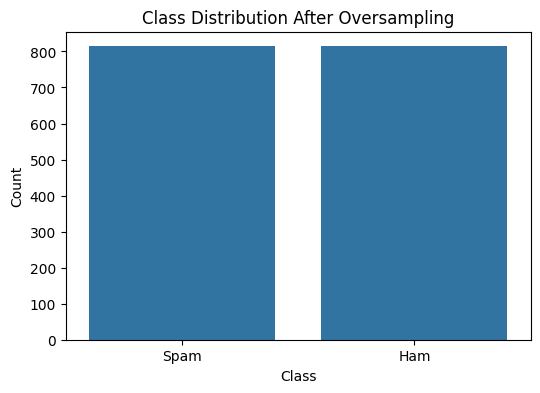

In [31]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)

# Plot the oversampled class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_oversampled)
plt.title("Class Distribution After Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [32]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_oversampled, y_train_oversampled)

MultinomialNB()

In [33]:
y_pred = model.predict(X_test)

# Computing the accuracy and making the confusion matrix
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, '\n\n')
print('---------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n",)
print (result)

accuracy:0.63


Confusion Matrix:
[[201   0]
 [144  47]] 


---------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

         Ham       0.58      1.00      0.74       201
        Spam       1.00      0.25      0.39       191

    accuracy                           0.63       392
   macro avg       0.79      0.62      0.57       392
weighted avg       0.79      0.63      0.57       392



## Sentiment Analysis

In [51]:
comment = pd.read_csv("/content/Youtubespamdataset.csv")

comment.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",Spam,Psy
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,Spam,Psy
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,Spam,Psy
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,Spam,Psy
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,Spam,Psy


In [52]:
comment.describe()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL
count,1956,1956,1711,1956,1956,1956
unique,1953,1792,1709,1760,2,5
top,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,M.E.S,2013-10-05T00:57:25.078000,Check out this video on YouTube:﻿,Spam,Eminem
freq,2,8,2,97,1005,448


In [53]:
# We can extract the values from the dictionary and create new columns within our dataframe

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

comment['compound'] = [sentiment.polarity_scores(comment)['compound'] for comment in comment['CONTENT']]
comment['neg'] = [sentiment.polarity_scores(comment)['neg'] for comment in comment['CONTENT']]
comment['neu'] = [sentiment.polarity_scores(comment)['neu'] for comment in comment['CONTENT']]
comment['pos'] = [sentiment.polarity_scores(comment)['pos'] for comment in comment['CONTENT']]

In [54]:
comment.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL,compound,neg,neu,pos
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",Spam,Psy,0.0000,0.000,1.000,0.000
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,Spam,Psy,0.6973,0.036,0.784,0.180
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,Spam,Psy,0.0000,0.000,1.000,0.000
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,Spam,Psy,0.3400,0.292,0.337,0.371
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,Spam,Psy,0.0000,0.000,1.000,0.000


In [55]:
comment[['compound', 'neg', 'neu','pos']].describe()

,compound,neg,neu,pos
count,1956.000000,1956.000000,1956.000000,1956.000000
mean,0.269364,0.031794,0.766607,0.201602
std,0.407596,0.092657,0.251066,0.246779
min,-0.967100,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.603750,0.000000
50%,0.072600,0.000000,0.813000,0.107500
75%,0.636900,0.000000,1.000000,0.347250
max,0.992100,0.787000,1.000000,1.000000


<Axes: xlabel='compound', ylabel='Count'>

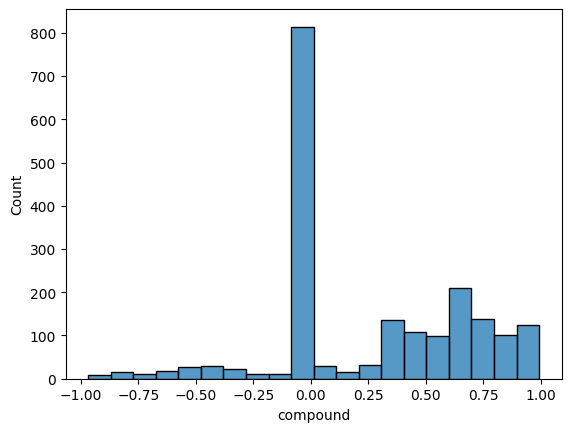

In [56]:
#Distribution of the compound score

sns.histplot(comment['compound'])

<Axes: xlabel='pos', ylabel='Count'>

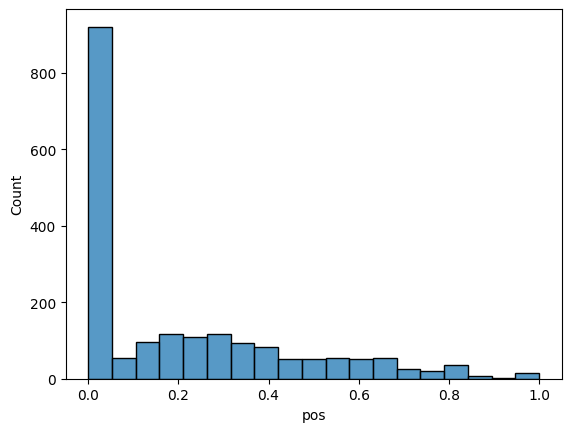

In [57]:
sns.histplot(comment['pos'])

<Axes: xlabel='neg', ylabel='Count'>

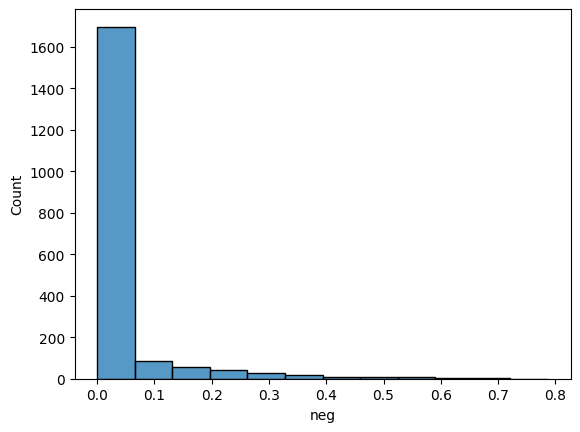

In [58]:
sns.histplot(comment['neg'])

In [61]:
## Let's look at how many negative reviews we have per CHANNEL

(comment['compound']<=0).groupby(comment['CHANNEL']).sum()

,compound
CHANNEL,
Eminem,206
KatyPerry,147
LMFAO,276
Psy,208
Shakira,130


In [63]:
## calculate as percentage of total reviews

percent_negative  = pd.DataFrame((comment['compound']<=0).groupby(comment['CHANNEL']).sum()
                                /comment['CHANNEL'].groupby(comment['CHANNEL']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews', ascending=False)

percent_negative

,% negative reviews
CHANNEL,
LMFAO,63.013699
Psy,59.428571
Eminem,45.982143
KatyPerry,42.000000
Shakira,35.135135


<Axes: xlabel='% negative reviews', ylabel='CHANNEL'>

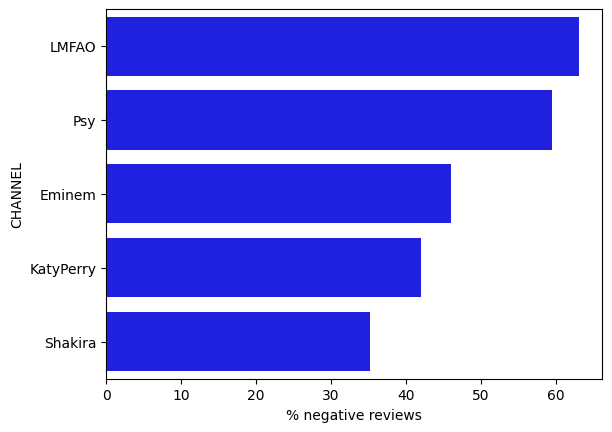

In [64]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='b')

In [65]:
comment.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL,compound,neg,neu,pos
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Ham,Shakira,0.6988,0.0,0.697,0.303
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Ham,Shakira,0.8442,0.0,0.649,0.351
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Ham,Shakira,0.5859,0.0,0.000,1.000
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Ham,Shakira,0.0000,0.0,1.000,0.000
1955,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,Ham,Shakira,0.6369,0.0,0.488,0.512


In [66]:
#Processing the text data ready for wordcloud visualisation for comments on Eminem channel


comment['processed_comment'] = comment['CONTENT'].apply(preprocess_text)

comment_positive_subset = comment.loc[
    (comment['CHANNEL'] == 'Eminem') &
    (comment['compound'] > 0)
]

comment_negative_subset = comment.loc[(comment['CHANNEL']=='Eminem')
                                       & (comment['compound']<=0),:]

comment_negative_subset.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CHANNEL,compound,neg,neu,pos,processed_comment
1139,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,Ham,Eminem,0.0,0.0,1.0,0.0,"[alway, end, come, back, song, br]"
1140,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",Spam,Eminem,0.0,0.0,1.0,0.0,"[sister, receiv, 6, 500, new, rel, nofollow, c..."
1141,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,Ham,Eminem,0.0,0.0,1.0,0.0,[cool]
1142,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,Spam,Eminem,0.0,0.0,1.0,0.0,"[hello, 39, palastin]"
1145,z12vxdzzds2kzzrzq04cdjc4ozq2szuyl5o,Damax,2015-05-29T00:41:22.426000,Almost 1 billion﻿,Ham,Eminem,0.0,0.0,1.0,0.0,"[almost, 1, billion]"


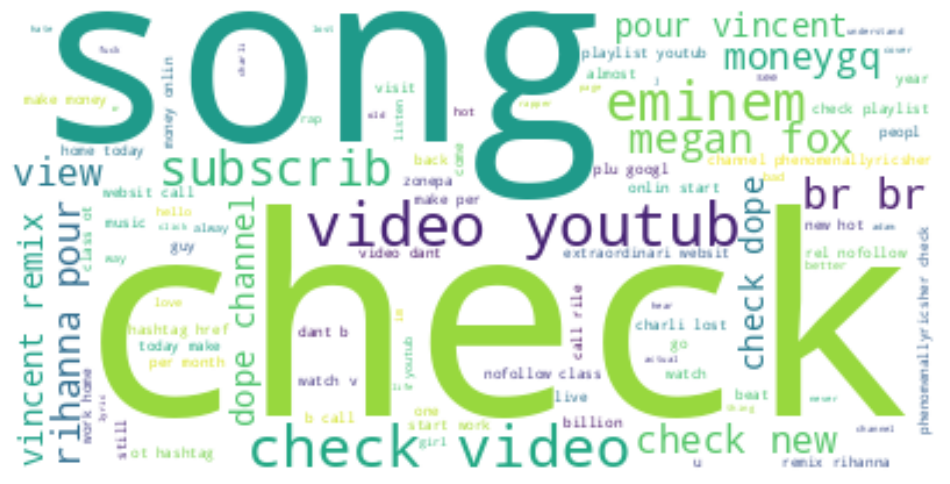

In [68]:
## Wordcloud of words from negative comment on Eminem YouTube channel

neg_tokens = [word for comment in comment_negative_subset['processed_comment'] for word in comment]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

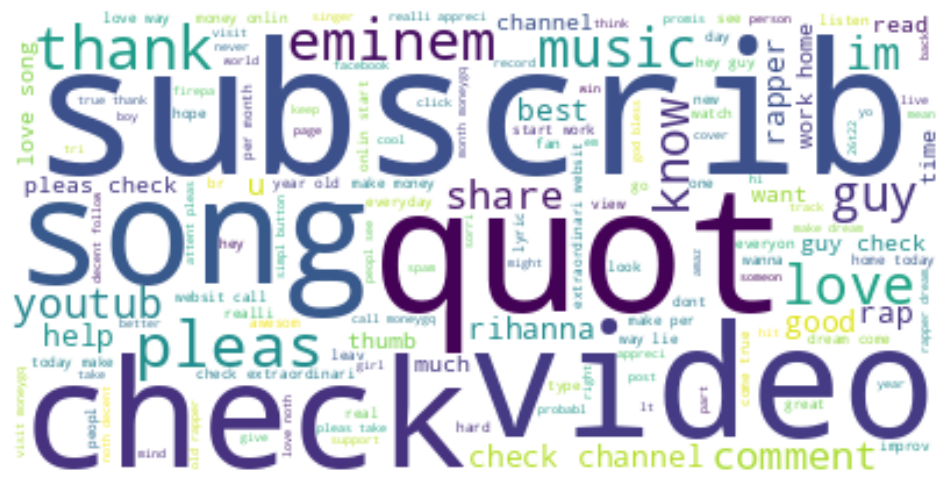

In [69]:
#For positive review

pos_tokens = [word for comment in comment_positive_subset['processed_comment'] for word in comment]

wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [70]:
# Use the nltk FreDist and then tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(10)

   check       39     like    pleas     love     song subscrib      com      guy     quot 
     122      107       79       78       68       62       56       56       55       51 


In [71]:
# Use the nltk FreDist and then tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

   check    video   youtub     song      com   eminem  channel       br       39 subscrib 
      86       44       34       25       25       21       21       19       18       15 


<Axes: xlabel='Samples', ylabel='Counts'>

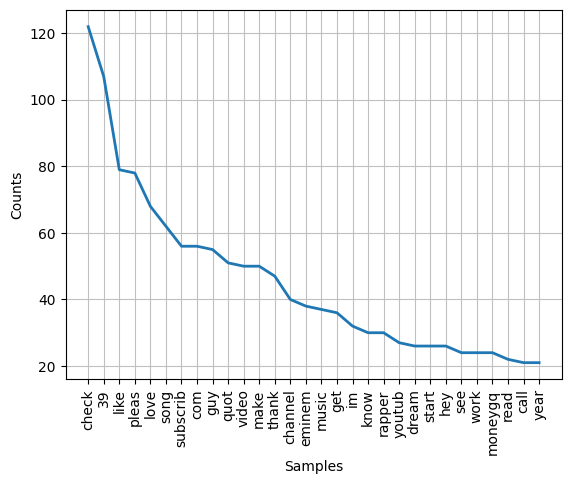

In [72]:
pos_freqdist.plot(30)

<Axes: xlabel='Samples', ylabel='Counts'>

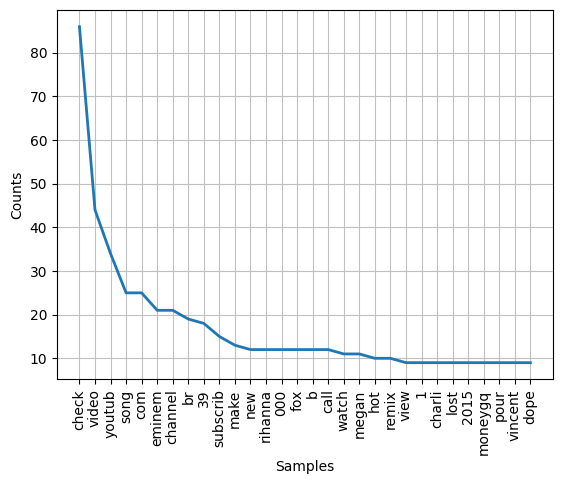

In [73]:
neg_freqdist.plot(30)